#**IMPORTING REQUIRED PACKAGES**

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import imblearn
import warnings
warnings.filterwarnings('ignore')

#**DATA SET GLIMPSING**

In [ ]:
df=pd.read_csv("/content/Customer Conversion Prediction - Customer Conversion Prediction (2).csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


#**DATA CLEANING**

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [ ]:
df.describe(include='object')

,job,marital,education_qual,call_type,mon,prev_outcome,y
count,45205,45205,45205,45205,45205,45205,45205
unique,12,3,4,3,12,4,2
top,blue-collar,married,secondary,cellular,may,unknown,no
freq,9730,27210,23199,29282,13765,36953,39916


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

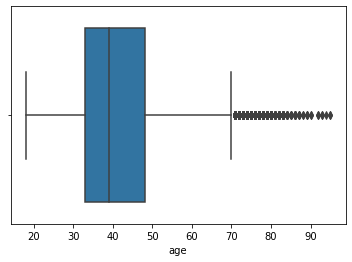

In [ ]:
sns.boxplot(df['age'])

In [ ]:
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  33.0
75th percentile of the data is  48.0
IQR : 15.0


In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

70.5
10.5


In [ ]:
df['age'] = np.where(
    df['age']>max_value,
    max_value,
    np.where(
        df['age']<min_value,
        min_value,
        df['age']
    ) 
)
df['age'].describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

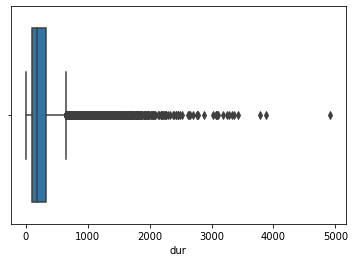

In [ ]:
sns.boxplot(df['dur'])

In [ ]:
percentile25 = df['dur'].quantile(0.25)
percentile75 = df['dur'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)
df['dur'] = np.where(
    df['dur']>max_value,
    max_value,
    np.where(
        df['dur']<min_value,
        min_value,
        df['dur']
    ) 
)
df['dur'].describe()

25th percentile of the data is  103.0
75th percentile of the data is  319.0
IQR : 216.0
643.0
-221.0


count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

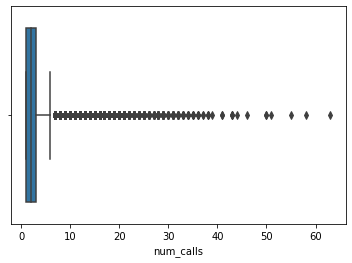

In [ ]:
sns.boxplot(df['num_calls'])

In [ ]:
percentile25 = df['num_calls'].quantile(0.25)
percentile75 = df['num_calls'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)
df['num_calls'] = np.where(
    df['num_calls']>max_value,
    max_value,
    np.where(
        df['num_calls']<min_value,
        min_value,
        df['num_calls']
    ) 
)
df['num_calls'].describe()

25th percentile of the data is  1.0
75th percentile of the data is  3.0
IQR : 2.0
6.0
-2.0


count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

#**EXPLORATORY DATA ANALYSIS**

CONTINUOUS DATA

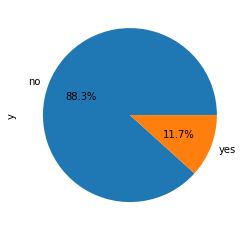

In [ ]:
df.y.value_counts().plot(kind='pie',autopct='%1.1f%%')

Above plot shows the dataset belongs to the class of onetype(i.e no)is maximum(88.3%).So highly imbalanced data need to balanced.

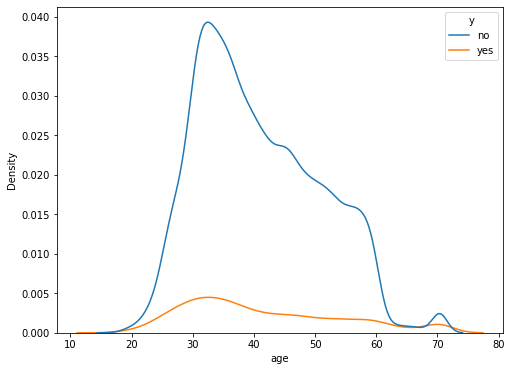

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="age",hue='y')

**INSIGHTS:-**We can see Age group between 20 to 40 having more subscriptions to insurance .

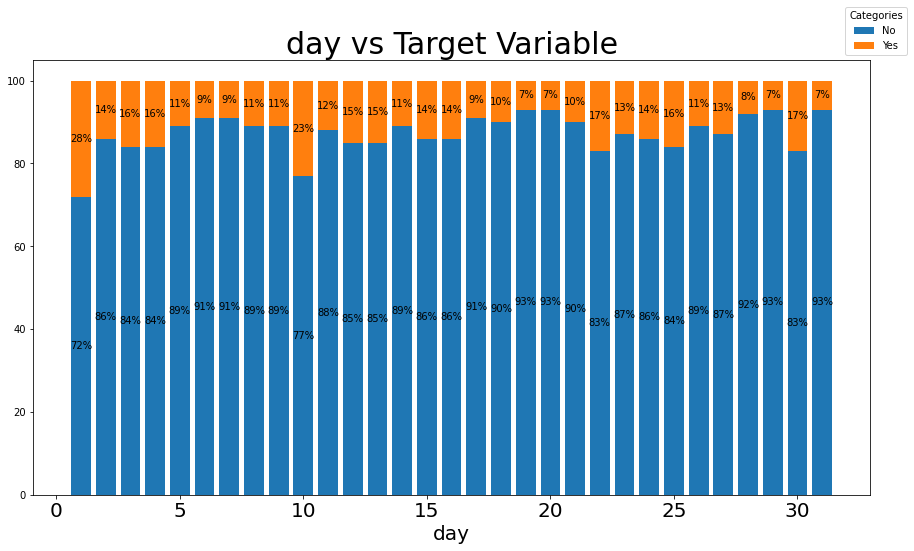

In [ ]:
df1 = round(pd.crosstab(index=df['y'],columns = df["day"], normalize = 'columns')*100)
df1
labels = df1.columns
list1 = df1.iloc[0].to_list()
list2 = df1.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,8))
bar_width = 0.8
ax.bar(labels,list1, bar_width, label = "No")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Yes")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',fontsize = 10)
plt.xlabel("day", size=20)    
plt.title("day vs Target Variable",size=30)
plt.xticks(rotation=0, fontsize = 20)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

INSIGHTS:- Month starting subscriptions are more.

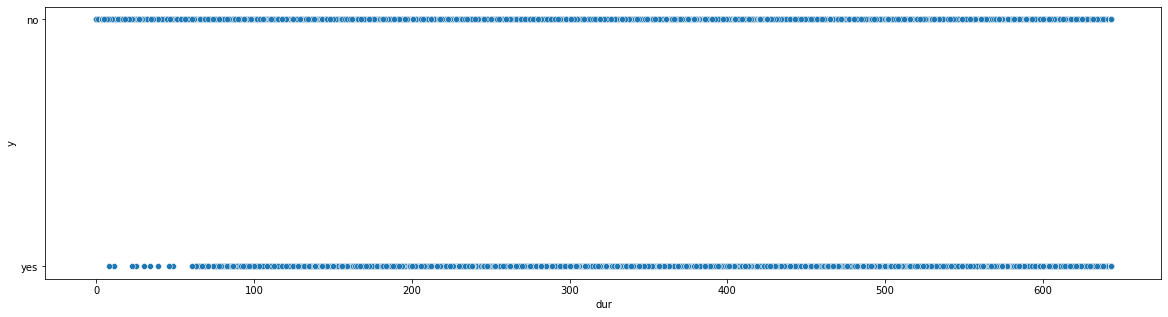

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(20,5)) 
sns.scatterplot(x='dur', y = 'y', data=df)

INSIGHTS:-Most subscriptions are done when call duration less than 600 sec (i.e less than 10 mins)

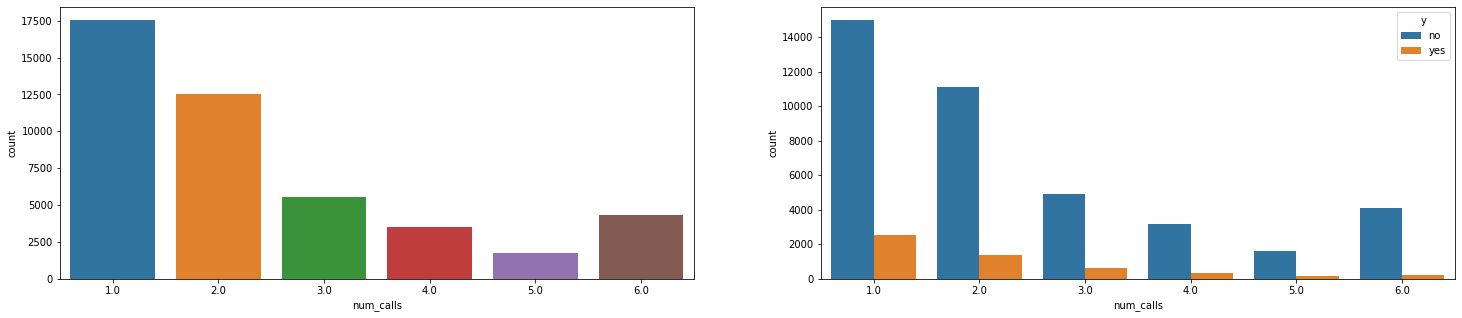

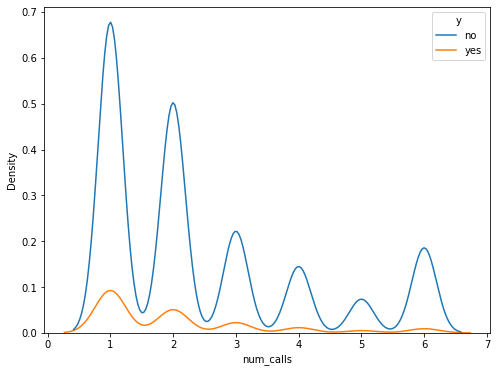

In [ ]:
ig, axes=plt.subplots(ncols=2,figsize=(25,5)) 
sns.countplot(x='num_calls', ax=axes[0], data=df) 
sns.countplot(x='num_calls', hue='y', ax=axes[1], data=df)
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="num_calls",hue='y')

INSIGHTS:-we can see if number of calls increases number of subscription decreasing.

CATEGORICAL DATA

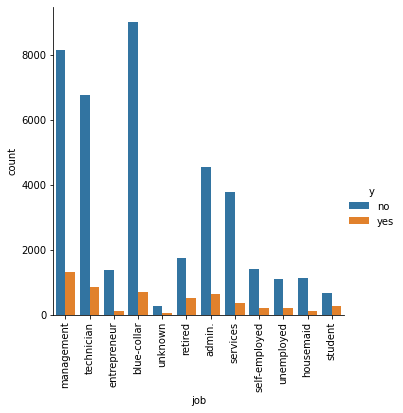

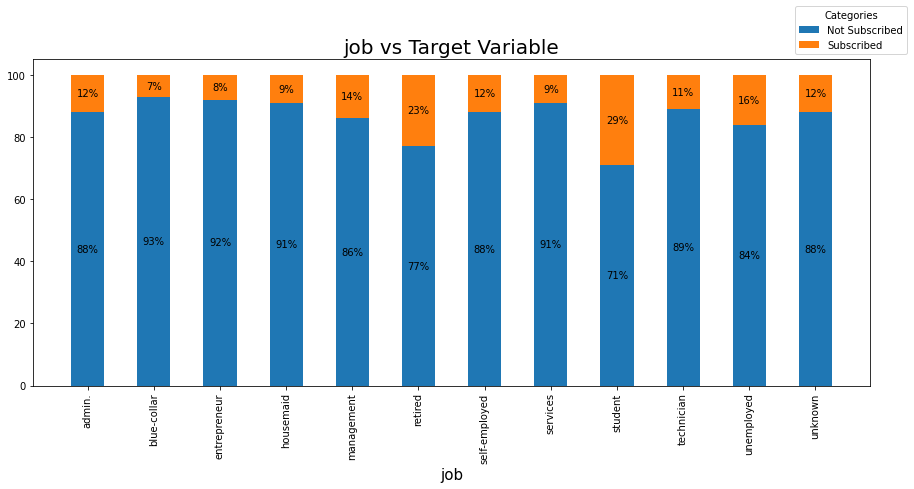

In [ ]:
sns.catplot(data=df, x="job",kind='count',hue='y')
plt.xticks(rotation=90)

df3 = round(pd.crosstab(index=df['y'],columns = df["job"], normalize = 'columns')*100)

labels = df3.columns
list1 = df3.iloc[0].to_list()
list2 = df3.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("job", size=15)
  
# Setting the title for the graph
plt.title("job vs Target Variable", size =20)
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

INSIGHTS:-
1.Approching retired customers and students can improve the sales count of insurance policies.



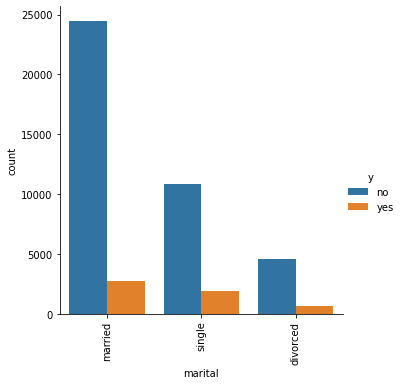

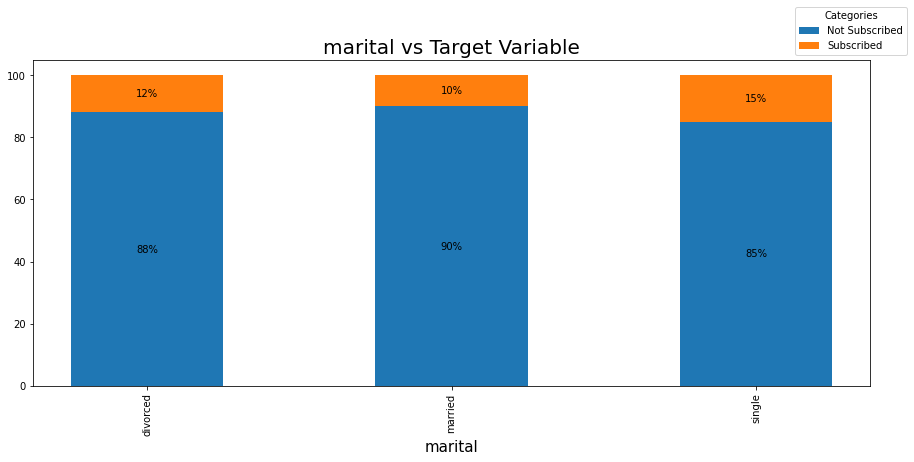

In [ ]:
sns.catplot(data=df, x="marital",kind='count',hue='y')
plt.xticks(rotation=90)

df4 = round(pd.crosstab(index=df['y'],columns = df["marital"], normalize = 'columns')*100)

labels = df4.columns
list1 = df4.iloc[0].to_list()
list2 = df4.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("marital", size=15)
  
# Setting the title for the graph
plt.title("marital vs Target Variable", size =20)
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

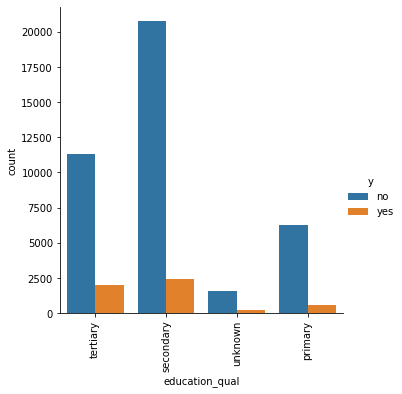

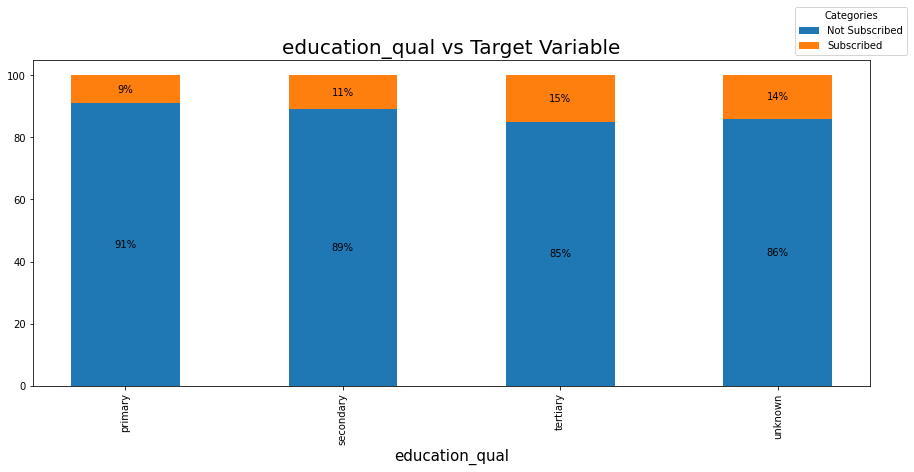

In [ ]:
sns.catplot(data=df, x="education_qual",kind='count',hue='y')
plt.xticks(rotation=90)

df3 = round(pd.crosstab(index=df['y'],columns = df["education_qual"], normalize = 'columns')*100)

labels = df3.columns
list1 = df3.iloc[0].to_list()
list2 = df3.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("education_qual", size=15)
  
# Setting the title for the graph
plt.title("education_qual vs Target Variable", size =20)
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

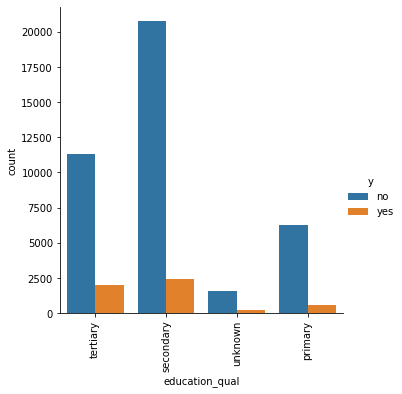

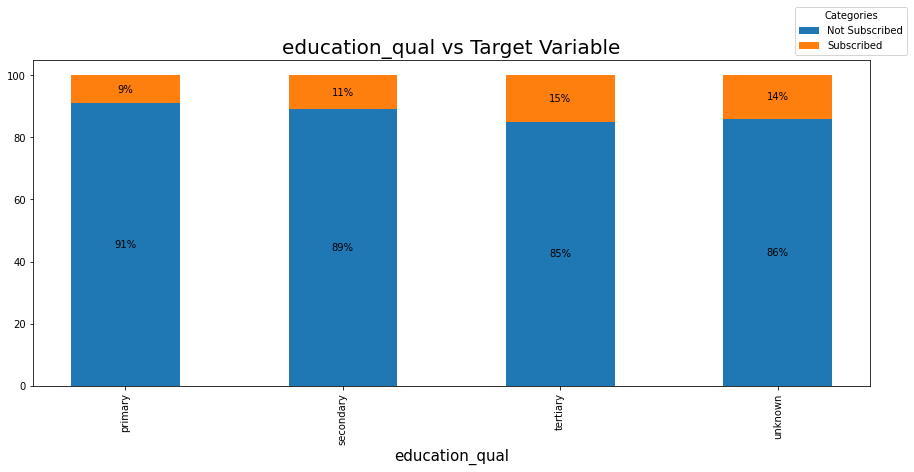

In [ ]:
sns.catplot(data=df, x="education_qual",kind='count',hue='y')
plt.xticks(rotation=90)



df3 = round(pd.crosstab(index=df['y'],columns = df["education_qual"], normalize = 'columns')*100)

labels = df3.columns
list1 = df3.iloc[0].to_list()
list2 = df3.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("education_qual", size=15)
  
# Setting the title for the graph
plt.title("education_qual vs Target Variable", size =20)
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

INSIGHTS:-Customers who having education level more are aware of insurance policies and thier importance.So higher the educational level more chances of convincing them to subcribe for insurance policy. 

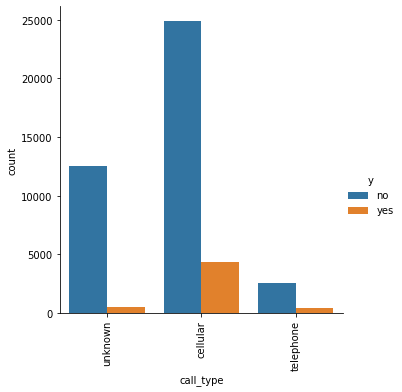

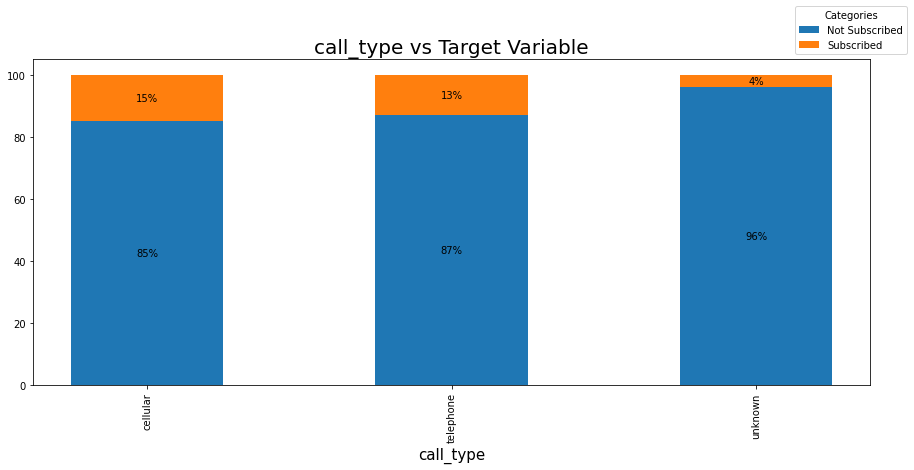

In [ ]:
sns.catplot(data=df, x="call_type",kind='count',hue='y')
plt.xticks(rotation=90)

df5 = round(pd.crosstab(index=df['y'],columns = df["call_type"], normalize = 'columns')*100)

labels = df5.columns
list1 = df5.iloc[0].to_list()
list2 = df5.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("call_type", size=15)
  
# Setting the title for the graph
plt.title("call_type vs Target Variable", size =20)
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

INSIGHTS:-People who uses cellular phone having more chances of making them to subscribe for the insurance policy as compared to other types.

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

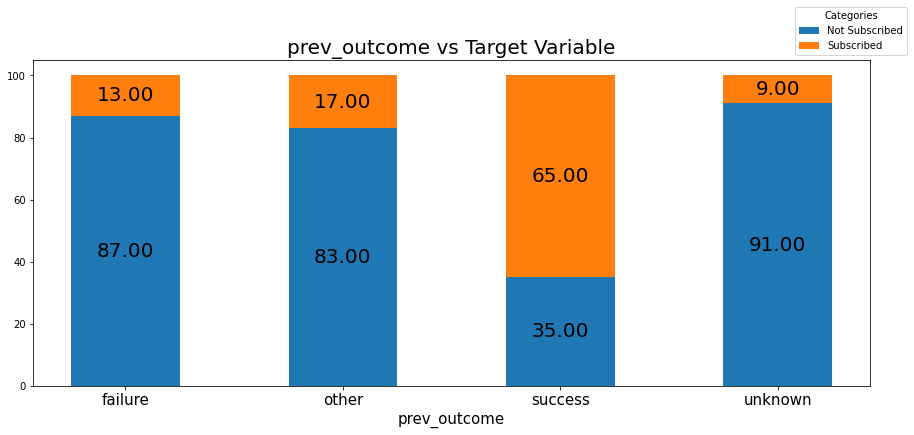

In [ ]:
default_by_group_7 = round(pd.crosstab(index=df['y'],columns = df["prev_outcome"], normalize = 'columns')*100)
default_by_group_7

labels = default_by_group_7.columns
list1 = default_by_group_7.iloc[0].to_list()
list2 = default_by_group_7.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',fontsize = 20)
plt.xlabel("prev_outcome", size=15)    
plt.title("prev_outcome vs Target Variable",fontsize=20)
plt.xticks(rotation=0, fontsize = 15)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

INSIGHTS:-When the prev_outcome is success, there are more subscriptions

#**Encoding**

onehot encoding

In [ ]:
df=pd.get_dummies(df, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])

In [ ]:
df.head()

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,5,261.0,1.0,no,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44.0,5,151.0,1.0,no,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,5,76.0,1.0,no,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,5,92.0,1.0,no,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,5,198.0,1.0,no,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Label encoding

In [ ]:
df.y = df.y.map({'no': 0,'yes': 1})

In [ ]:
df.head()

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,5,261.0,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44.0,5,151.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,5,76.0,1.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,5,92.0,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,5,198.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#**Splitting**

In [ ]:
X = df.drop('y',axis=1).values
y = df['y'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Blancing the data

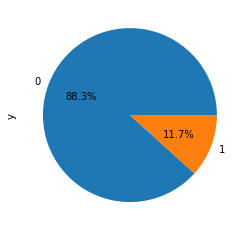

In [ ]:
df.y.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

Original unbalanced dataset shape 45205
Resampled balanced dataset shape 79832


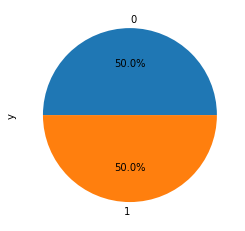

In [ ]:
x_smote, y_smote = smote.fit_resample(X,y)
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'y'))
balanced_df['y'] = y_smote
balanced_df.y.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
balanced_df.y.value_counts()

0    39916
1    39916
Name: y, dtype: int64

In [ ]:
X = balanced_df.drop(['y','prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],axis=1)
X.shape

(79832, 38)

Logistic regresstion

model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
lr.score(X_test,y_test)

0.894708901079455

KNN

scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  train score :  0.9999410081703684  score :  0.8694510455839639
K value  :  2  train score :  0.9305666165236115  score :  0.8864406823893543
K value  :  3  train score :  0.9325723387310857  score :  0.8853195818534051
K value  :  4  train score :  0.917204967112055  score :  0.8905110438963455
K value  :  5  train score :  0.9190337138306345  score :  0.8905404293335908
K value  :  6  train score :  0.9103029230451583  score :  0.893106479149649
K value  :  7  train score :  0.9130165472082117  score :  0.8931064878487129
K value  :  8  train score :  0.9076777866265522  score :  0.8935195541903825
K value  :  9  train score :  0.9087101436451052  score :  0.8936374178047217
K value  :  10  train score :  0.9050231542931304  score :  0.8932540848628461
K value  :  20  train score :  0.89835707754476  score :  0.8930770763142762
K value  :  50  train score :  0.8948175677668643  score :  0.8930180879631925


In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8942665015041585

Decision Tree Fitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.8584575165461755

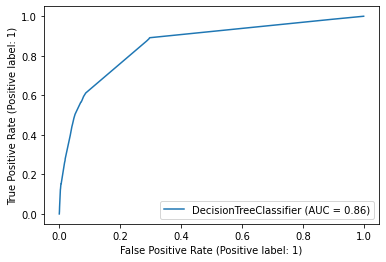

In [ ]:
plot_roc_curve(dt, X_test, y_test)

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
acc1 = roc_auc_score(y_test, predictions)
print("Test set auc: {:.2f}".format(acc1))

Test set auc: 0.56


In [ ]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.9040124170060826

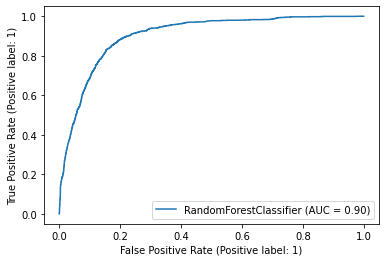

In [ ]:
plot_roc_curve(rf, X_test, y_test)

XG BOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.900274312007787  Cross-Val score :  0.8988290625280001
Learning rate :  0.02  Train score :  0.9006282629855765  Cross-Val score :  0.8982094369183045
Learning rate :  0.03  Train score :  0.8978556469928914  Cross-Val score :  0.8975015419090443
Learning rate :  0.04  Train score :  0.8996548977966552  Cross-Val score :  0.8976196316990401
Learning rate :  0.05  Train score :  0.901424652685603  Cross-Val score :  0.8993600272802637
Learning rate :  0.06  Train score :  0.9025454974486034  Cross-Val score :  0.9003038582957317
Learning rate :  0.07  Train score :  0.9036368462967879  Cross-Val score :  0.9011002314820857
Learning rate :  0.08  Train score :  0.9051706338672094  Cross-Val score :  0.902014555273416
Learning rate :  0.09  Train score :  0.9057605521635254  Cross-Val score :  0.9026339721055822
Learning rate :  0.1  Train score :  0.9072943397339468  Cross-Val score :  0.9039612926460723
Learning rate :  0.11  Train score :  0.9077

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

0.9032914528402053

In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['age', 'day', 'dur', 'num_calls', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],selector.support_))

[('age', True),
 ('day', True),
 ('dur', True),
 ('num_calls', False),
 ('y', False),
 ('job_admin.', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', False),
 ('job_housemaid', False),
 ('job_management', False),
 ('job_retired', False),
 ('job_self-employed', False),
 ('job_services', False),
 ('job_student', False),
 ('job_technician', False),
 ('job_unemployed', False),
 ('job_unknown', False),
 ('marital_divorced', False),
 ('marital_married', False),
 ('marital_single', False),
 ('education_qual_primary', False),
 ('education_qual_secondary', False),
 ('education_qual_tertiary', False),
 ('education_qual_unknown', False),
 ('call_type_cellular', False),
 ('call_type_telephone', False),
 ('call_type_unknown', False),
 ('mon_apr', False),
 ('mon_aug', False),
 ('mon_dec', False),
 ('mon_feb', False),
 ('mon_jan', False),
 ('mon_jul', False),
 ('mon_jun', False),
 ('mon_mar', False),
 ('mon_may', False),
 ('mon_nov', False),
 ('mon_oct', False),
 ('mon_sep', False),
 ('pre

**Important Features**

-> Age


-> Day


-> Dur

**CONCLUSION**

**Logistic Regression -**  **0.89**

   **K Nearest Neighbours -**  **0.89**

   **Decision Tree -**  **0.86**

   **Random Forest -**   **0.91**

   **XG Boost -**   **0.90**

 The best Machine Learning algorithm for Customer conversion Prediction is **RANDOM FOREST** Model